In [1]:
!pip install --upgrade tensorflow


     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 3.8MB 34.7MB/s 
     |████████████████████████████████| 450kB 37.2MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

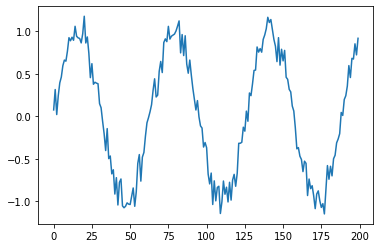

In [2]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [3]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) 
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [17]:
model=tf.keras.models.Sequential([tf.keras.layers.Input(shape=(T,1)),tf.keras.layers.SimpleRNN(5),tf.keras.layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1), loss='mse')

r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 11ms/sample - loss: 0.1513 - val_loss: 0.0528
Epoch 2/80
95/95 [==============================] - 0s 337us/sample - loss: 0.0639 - val_loss: 0.0446
Epoch 3/80
95/95 [==============================] - 0s 328us/sample - loss: 0.0453 - val_loss: 0.0453
Epoch 4/80
95/95 [==============================] - 0s 311us/sample - loss: 0.0485 - val_loss: 0.0291
Epoch 5/80
95/95 [==============================] - 0s 310us/sample - loss: 0.0475 - val_loss: 0.0295
Epoch 6/80
95/95 [==============================] - 0s 298us/sample - loss: 0.0415 - val_loss: 0.0344
Epoch 7/80
95/95 [==============================] - 0s 309us/sample - loss: 0.0354 - val_loss: 0.0251
Epoch 8/80
95/95 [==============================] - 0s 360us/sample - loss: 0.0343 - val_loss: 0.0233
Epoch 9/80
95/95 [==============================] - 0s 329us/sample - loss: 0.0302 - val_loss: 0.0286
Epoch 10/80
95/95 [====================

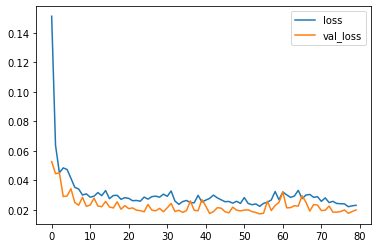

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

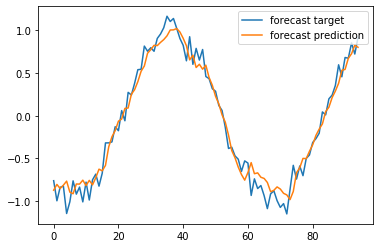

In [20]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

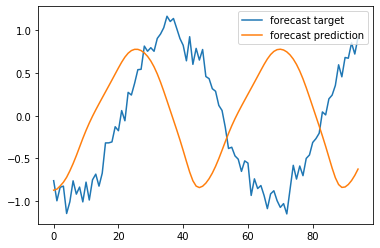

In [22]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()